# This notebook gives an introduction to the xcube's "zenodo" data store and its preload_data method

This notebook shows an example how to preload compressed files published on the [https://zenodo.org](https://zenodo.org) webpage. The compressed files will be downloaded, unpacked and the the individual files will be made available as a Zarr file, which can be subsequently used by the data store as usual. 

### Setup
In order to run this notebook you need to get an access token for the Zenodo API following the [documentation](https://zenodo.org/login/?next=%2Faccount%2Fsettings%2Fapplications%2Ftokens%2Fnew%2F). Furthermore, make sure that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is installed. You may install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) directly from the git repository by cloning the repository, directing into `xcube-zenodo`, and following the steps below:

```bash
conda env create -f environment.yml
conda activate xcube-zenodo
pip install .
```

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
%%time
from xcube.core.store import new_data_store
from xcube.core.store import get_data_store_params_schema
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Log format
    datefmt='%Y-%m-%d %H:%M:%S',  # Timestamp format
)

CPU times: user 2.91 s, sys: 193 ms, total: 3.1 s
Wall time: 1.24 s


First, we get the store parameters needed to initialize a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework). 

In [2]:
%%time
store_params = get_data_store_params_schema("zenodo")
store_params

CPU times: user 33.9 ms, sys: 7.05 ms, total: 40.9 ms
Wall time: 40.2 ms


We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) with the access_token. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can add a relative path to a folder where preloaded data will be stored. 

In [3]:
%%time
access_token = "fill in you Zenodo access token here"
store = new_data_store("zenodo", access_token=access_token, preload_cache_folder="preload_cache")

CPU times: user 5.04 ms, sys: 4 μs, total: 5.05 ms
Wall time: 4.98 ms


Compressed files can be preloaded using the `preload_data` method. Also this method uses `preload_params`, which can be viewed in the next cell.

In [4]:
%%time
preload_params = store.get_preload_data_params()
preload_params

CPU times: user 30 μs, sys: 2 μs, total: 32 μs
Wall time: 34.1 μs


 This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. The `preload_data` method is non-blocking and returns a handler which can be used to cancel the preload by typing `handler.cancel()` indto the next cell.

In [5]:
handler = store.preload_data("13333034/belgium.zip", "13333034/denmark.zip")

Data ID,Status,Progress,Message
13333034/belgium.zip,Preloaded,nan%,
13333034/denmark.zip,Preloaded,nan%,


The data IDs can be view by using the following line. Note that in this example the zipped file contain multiple files. If this is the case and `merge=False` (which is the default), each file is written to a Zarr file. The data ID is extended by the individual file names where the file extension is adjusted. 

In [6]:
store.cache_store.list_data_ids()

['13333034/belgium/number_disturbances_belgium.zarr',
 '13333034/belgium/annual_disturbances_1985_2023_belgium.zarr',
 '13333034/belgium/latest_disturbance_belgium.zarr',
 '13333034/belgium/disturbance_agent_1985_2023_belgium.zarr',
 '13333034/belgium/forest_mask_belgium.zarr',
 '13333034/belgium/disturbance_agent_aggregated_belgium.zarr',
 '13333034/belgium/greatest_disturbance_belgium.zarr',
 '13333034/belgium/disturbance_probability_1985_2023_belgium.zarr',
 '13333034/belgium/disturbance_severity_1985_2023_belgium.zarr',
 '13333034/denmark/disturbance_severity_1985_2023_denmark.zarr',
 '13333034/denmark/latest_disturbance_denmark.zarr',
 '13333034/denmark/disturbance_probability_1985_2023_denmark.zarr',
 '13333034/denmark/disturbance_agent_aggregated_denmark.zarr',
 '13333034/denmark/number_disturbances_denmark.zarr',
 '13333034/denmark/annual_disturbances_1985_2023_denmark.zarr',
 '13333034/denmark/greatest_disturbance_denmark.zarr',
 '13333034/denmark/forest_mask_denmark.zarr',
 '

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [7]:
%%time
open_params = store.get_open_data_params_schema(data_id="13333034/belgium/disturbance_probability_1985_2023_belgium.zarr")
open_params

CPU times: user 2.09 ms, sys: 153 μs, total: 2.25 ms
Wall time: 1.82 ms


In [8]:
%%time
ds = store.open_data("13333034/belgium/disturbance_probability_1985_2023_belgium.zarr")
ds

CPU times: user 24.7 ms, sys: 5.98 ms, total: 30.6 ms
Wall time: 30 ms


<xarray.Dataset> Size: 27GB
Dimensions:      (y: 9084, x: 9390)
Coordinates:
    spatial_ref  int64 8B ...
  * x            (x) float64 75kB 3.795e+06 3.795e+06 ... 4.076e+06 4.076e+06
  * y            (y) float64 73kB 3.189e+06 3.189e+06 ... 2.917e+06 2.917e+06
Data variables: (12/39)
    band_1       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_10      (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_11      (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_12      (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_13      (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_14      (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    ...           ...
    band_4       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_5       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_6       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_7       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_8       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_9       (y, x) float64 682MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/konstantin/bc_kon/01_coding/01_github/xcube-zenodo...

We plot parts of the opened data as an example below.

CPU times: user 543 ms, sys: 65.8 ms, total: 609 ms
Wall time: 551 ms


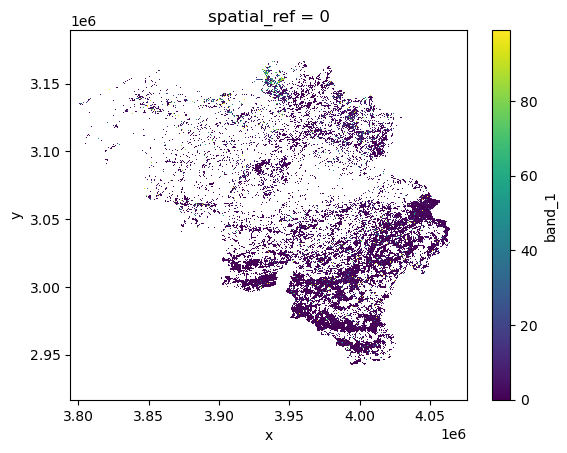

In [9]:
%%time
ds.band_1[::10, ::10].plot()